# Stroke Prognosis: Prueba de los Modelos

<p>
Curso de Minería de Datos <br>
Autor: Cristian Pavez Hormazábal
</p>

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

import sklearn as sk
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import yellowbrick as yb
from yellowbrick.classifier import ConfusionMatrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


ModuleNotFoundError: No module named 'distutils'

In [ ]:
# Importación de datos
dataset = pd.read_csv("all-data.csv")

# Formateo de los datos
dataset.drop("id", axis=1, inplace=True)
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

# Eliminar filas con valores perdidos
dataset_no_bmi = dataset.drop("bmi", axis=1)
dataset = dataset.dropna()

# Dividir el dataset en personas con y sin stroke
stroke_data = dataset[dataset['stroke'] == 1]
no_stroke_data = dataset[dataset['stroke'] == 0]

# Sobre-representar los datos de stroke (multiplicar por 22)
stroke_data_overrepresented = pd.concat([stroke_data] * 22, ignore_index=True)

# Combinar los datasets
balanced_dataset = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)

# Mezclar los datos para evitar orden
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Segundo Balanceo
# Dividir el dataset en personas con y sin stroke
stroke_data = dataset_no_bmi[dataset_no_bmi['stroke'] == 1]
no_stroke_data = dataset_no_bmi[dataset_no_bmi['stroke'] == 0]

# Sobre-representar los datos de stroke
stroke_data_overrepresented = pd.concat([stroke_data] * 19, ignore_index=True)

# Combinar los datasets
balanced_dataset2 = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)

# Mezclar los datos para evitar orden
balanced_dataset2 = balanced_dataset2.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar el balance
print('Dataset original:', dataset['stroke'].value_counts())
print('Dataset sin IMC:', dataset_no_bmi['stroke'].value_counts())
print('Dataset original balanceado:', balanced_dataset['stroke'].value_counts())
print('Dataset sin IMC balanceado:', balanced_dataset2['stroke'].value_counts())

Dataset original: stroke
0    4700
1     209
Name: count, dtype: int64
Dataset sin IMC: stroke
0    4861
1     249
Name: count, dtype: int64
Dataset original balanceado: stroke
0    4700
1    4598
Name: count, dtype: int64
Dataset sin IMC balanceado: stroke
0    4861
1    4731
Name: count, dtype: int64


In [ ]:
training_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

x1 = dataset[training_columns]
y1 = dataset['stroke']

x2 = balanced_dataset[training_columns]
y2 = balanced_dataset['stroke']

training_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status']

x3 = dataset_no_bmi[training_columns]
y3 = dataset_no_bmi['stroke']

x4 = balanced_dataset2[training_columns]
y4 = balanced_dataset2['stroke']


x1_train, x1_test, y1_train, y1_test = sk.model_selection.train_test_split(x1, y1, random_state = 42, test_size=0.2, shuffle=True)
x2_train, x2_test, y2_train, y2_test = sk.model_selection.train_test_split(x2, y2, random_state = 42, test_size=0.2, shuffle=True)
x3_train, x3_test, y3_train, y3_test = sk.model_selection.train_test_split(x3, y3, random_state = 42, test_size=0.2, shuffle=True)
x4_train, x4_test, y4_train, y4_test = sk.model_selection.train_test_split(x4, y4, random_state = 42, test_size=0.2, shuffle=True)

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.8706720977596741


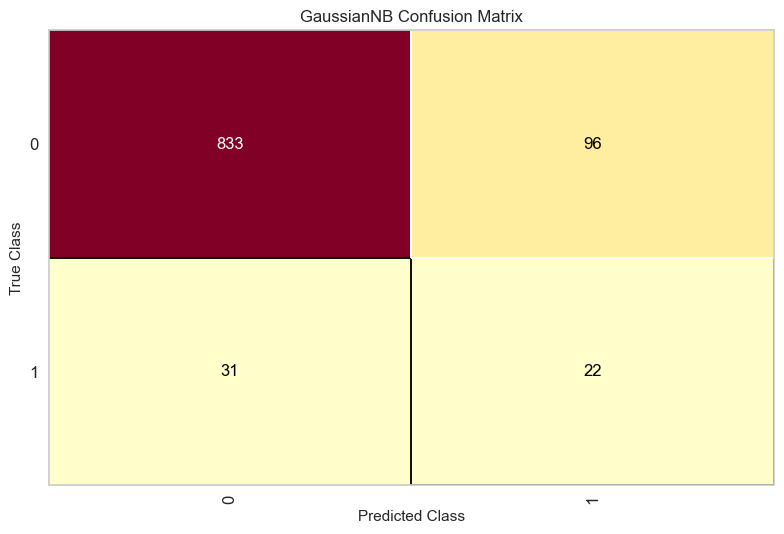

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x1_train, y1_train)
previsoes = naive_bayes.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.7559139784946236


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


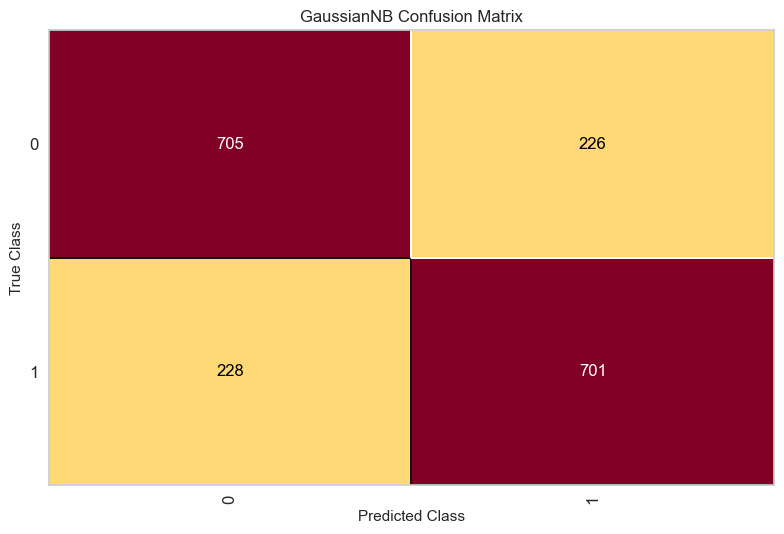

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x2_train, y2_train)
previsoes = naive_bayes.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.8669275929549902


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


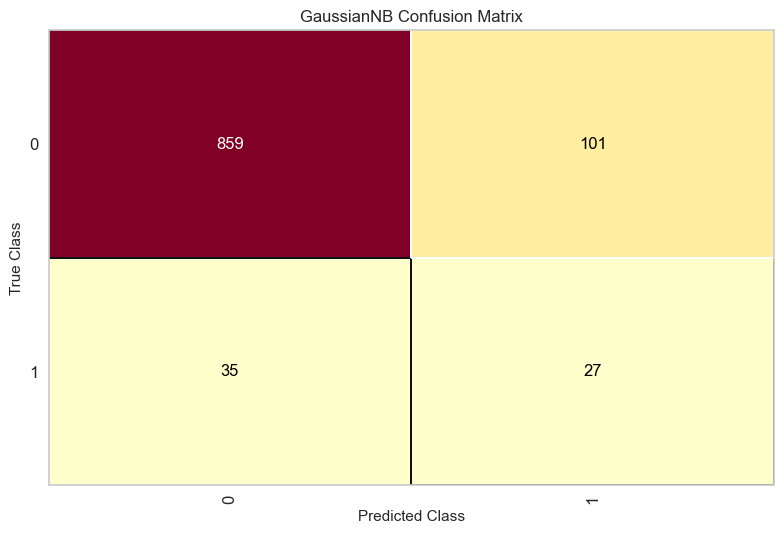

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x3_train, y3_train)
previsoes = naive_bayes.predict(x3_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x3_train, y3_train)
score_naive_gaussian = cm.score(x3_test, y3_test)
print(score_naive_gaussian)
cm.show()

0.7269411151641479


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


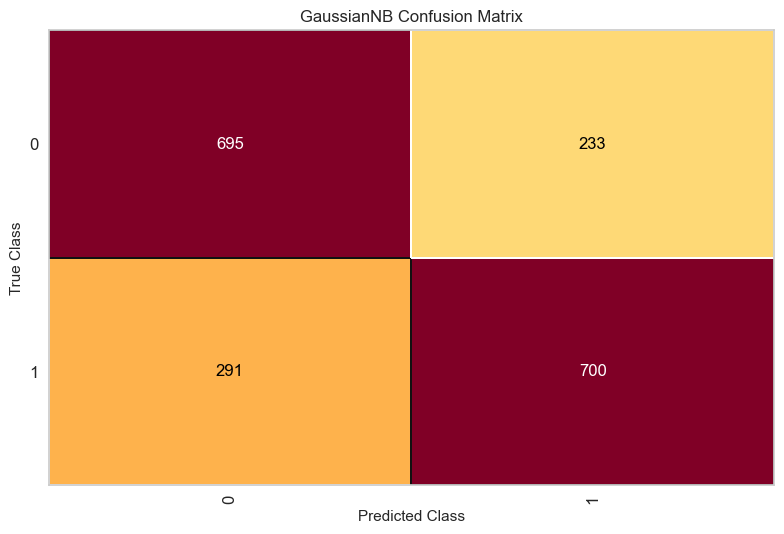

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x4_train, y4_train)
previsoes = naive_bayes.predict(x4_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x4_train, y4_train)
score_naive_gaussian = cm.score(x4_test, y4_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


0.9429735234215886


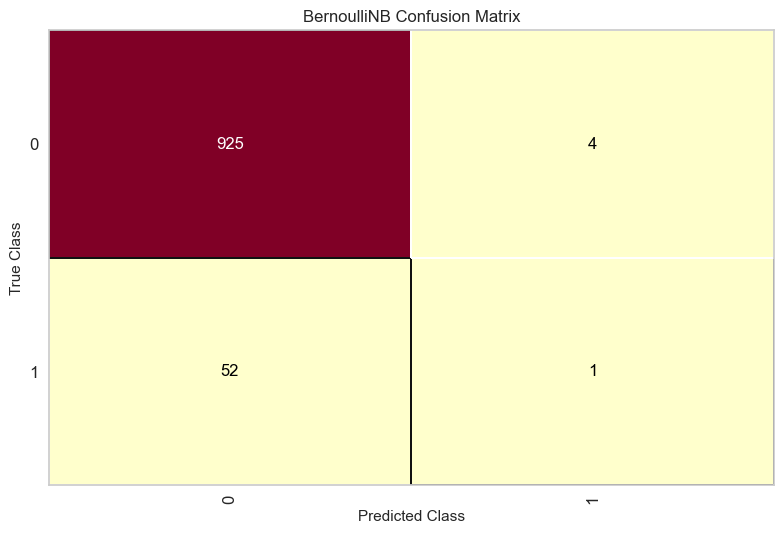

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x1_train, y1_train)
previsoes = naive_bayes.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


0.656989247311828


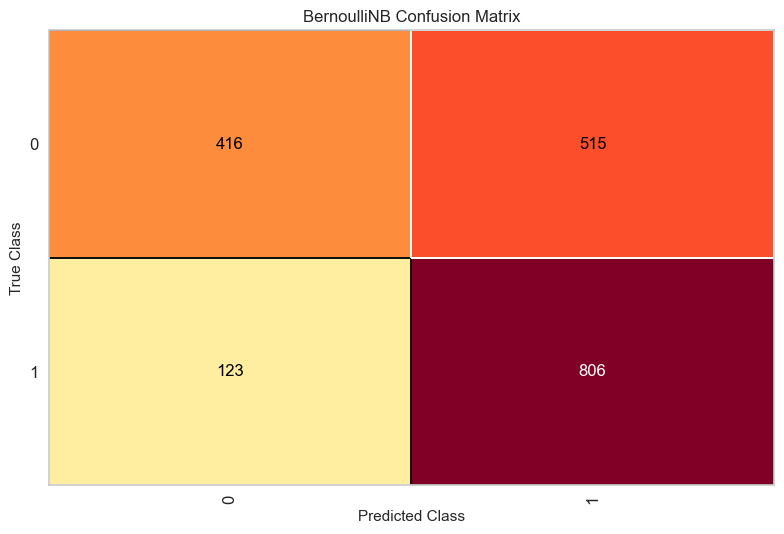

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x2_train, y2_train)
previsoes = naive_bayes.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9393346379647749


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


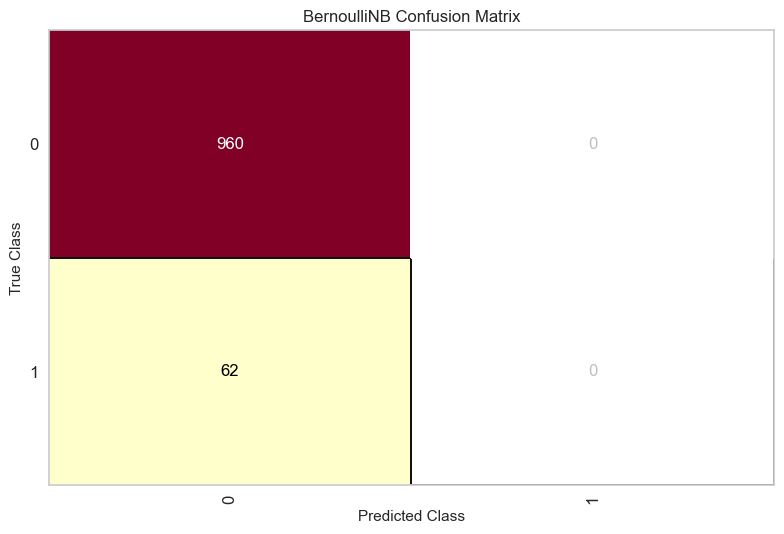

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x3_train, y3_train)
previsoes = naive_bayes.predict(x3_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x3_train, y3_train)
score_naive_gaussian = cm.score(x3_test, y3_test)
print(score_naive_gaussian)
cm.show()

0.6206357477853048


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


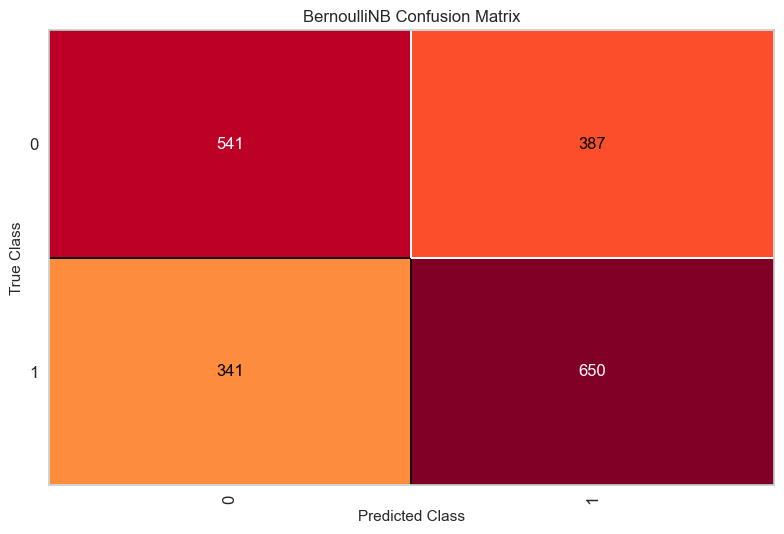

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x4_train, y4_train)
previsoes = naive_bayes.predict(x4_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x4_train, y4_train)
score_naive_gaussian = cm.score(x4_test, y4_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9164969450101833


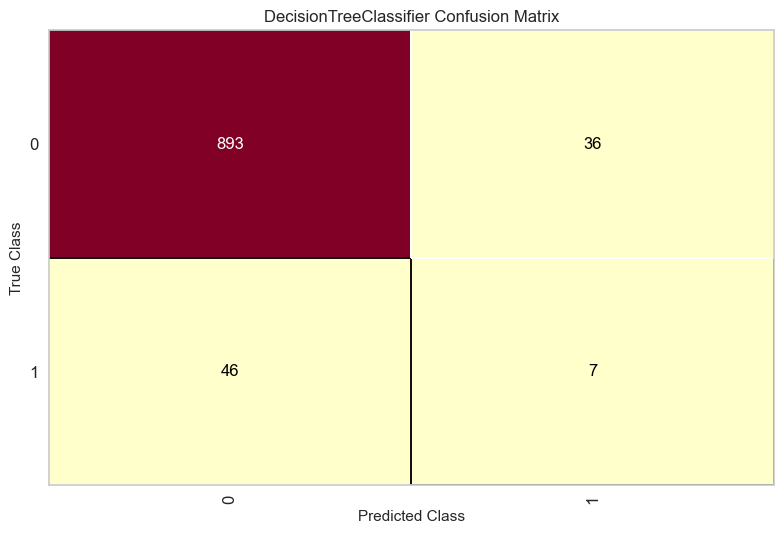

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(x1_train, y1_train)
previsoes = tree.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.9731182795698925


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


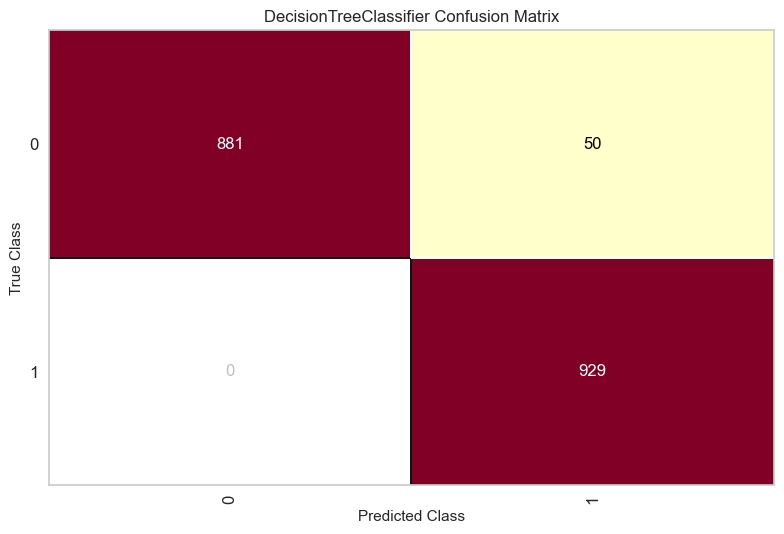

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(x2_train, y2_train)
previsoes = tree.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9119373776908023


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


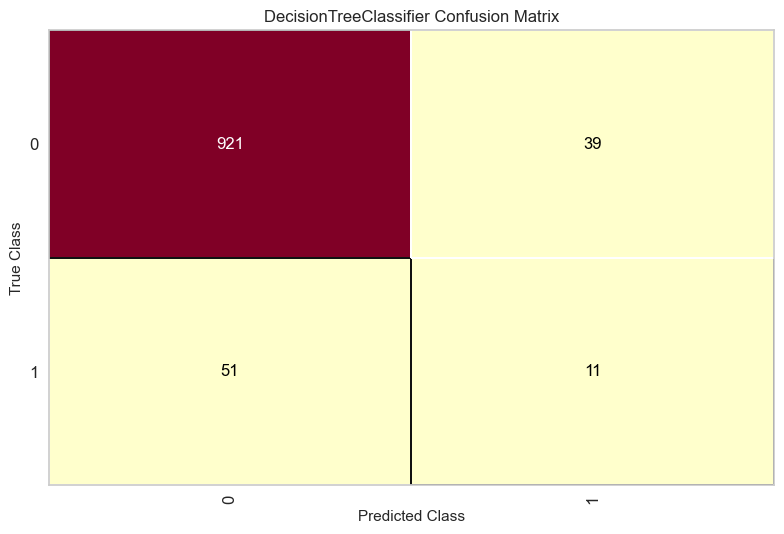

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(x3_train, y3_train)
previsoes = tree.predict(x3_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(x3_train, y3_train)
score_naive_gaussian = cm.score(x3_test, y3_test)
print(score_naive_gaussian)
cm.show()

0.9807191245440333


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


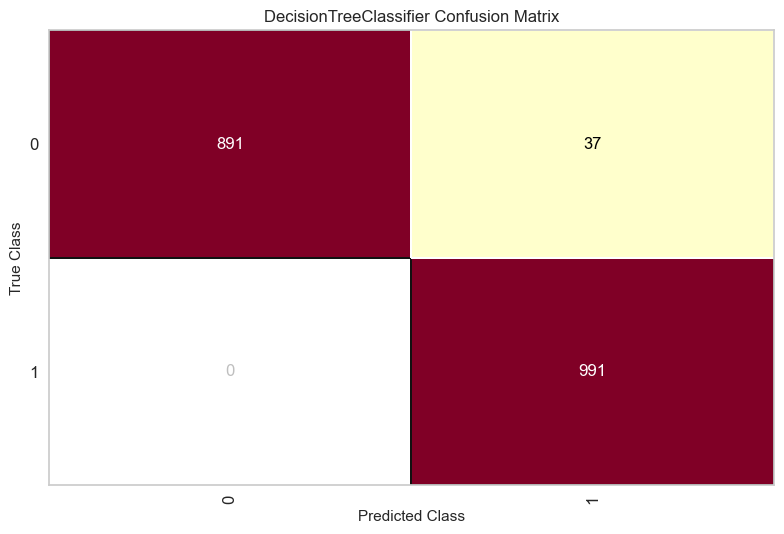

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(x4_train, y4_train)
previsoes = tree.predict(x4_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(x4_train, y4_train)
score_naive_gaussian = cm.score(x4_test, y4_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Undefin

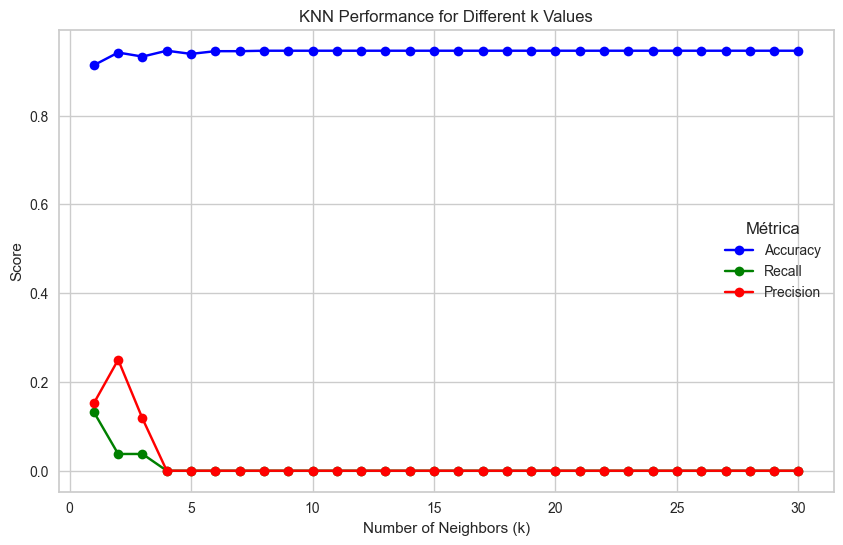

In [ ]:
# Loop to test all k values from 1 to 30
k_values = range(1, 31)
scores = []
recall = []
precision = []
for k in k_values:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(x1_train, y1_train)
    previsoes = knn.predict(x1_test)
    
    # Calculate and store the score
    score = knn.score(x1_test, y1_test)
    recall_score = sk.metrics.recall_score(y1_test, previsoes)
    precision_score = sk.metrics.precision_score(y1_test, previsoes)
    scores.append(score)
    recall.append(recall_score)
    precision.append(precision_score)
    
    """
    # Visualize the confusion matrix
    cm = ConfusionMatrix(knn)
    cm.fit(x1_train, y1_train)
    cm.score(x1_test, y1_test)
    cm.show()
    
    # Print classification report
    print(f"Classification Report for k={k}:")
    print(classification_report(y1_test, previsoes))
    """
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', label='Accuracy', color='blue')
plt.plot(k_values, recall, marker='o', label='Recall', color='green')
plt.plot(k_values, precision, marker='o', label='Precision', color='red')
plt.title('KNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Métrica', loc='best')
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9134419551934827


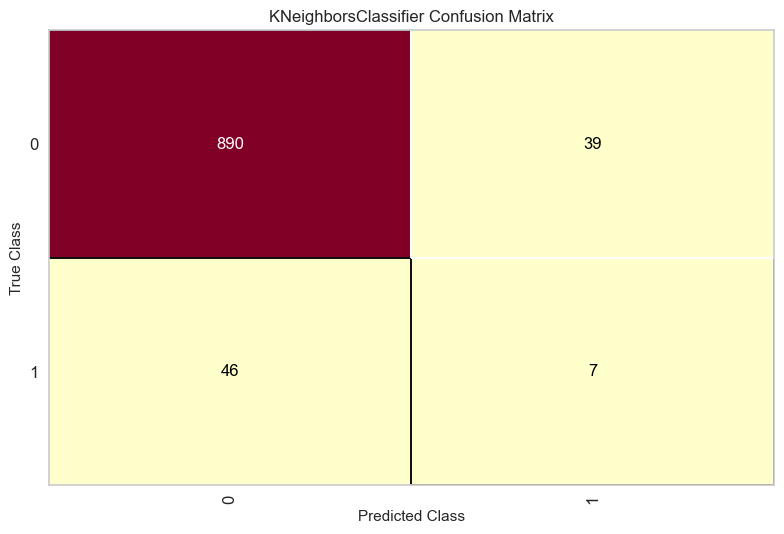

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(x1_train, y1_train)
previsoes = knn.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

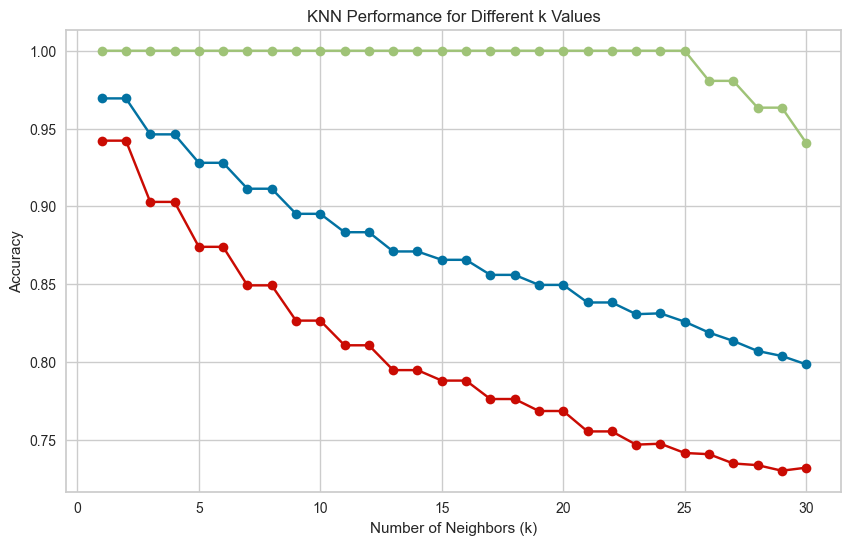

In [ ]:
# Loop to test all k values from 1 to 30
k_values = range(1, 31)
scores = []
recall = []
precision = []
for k in k_values:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(x2_train, y2_train)
    previsoes = knn.predict(x2_test)
    
    # Calculate and store the score
    score = knn.score(x2_test, y2_test)
    recall_score = sk.metrics.recall_score(y2_test, previsoes)
    precision_score = sk.metrics.precision_score(y2_test, previsoes)
    scores.append(score)
    recall.append(recall_score)
    precision.append(precision_score)
    
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', label='Accuracy', color='blue')
plt.plot(k_values, recall, marker='o', label='Recall', color='green')
plt.plot(k_values, precision, marker='o', label='Precision', color='red')
plt.title('KNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Métrica', loc='best')
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9693548387096774


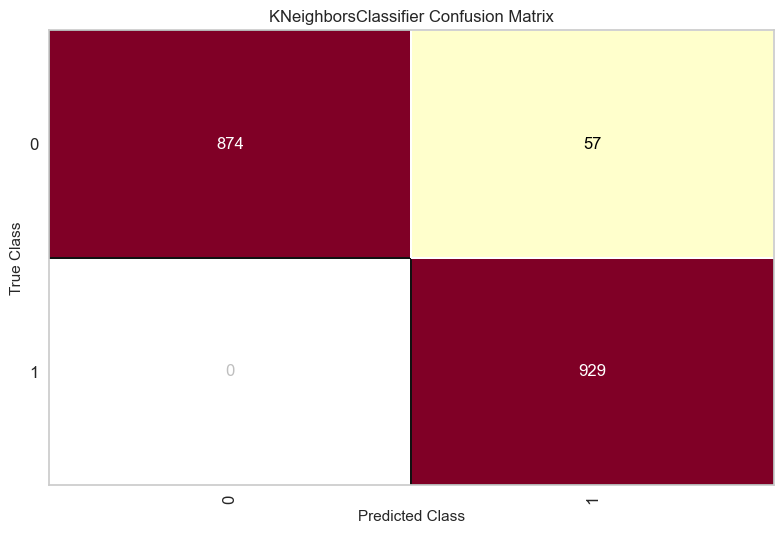

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(x2_train, y2_train)
previsoes = knn.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Undefin

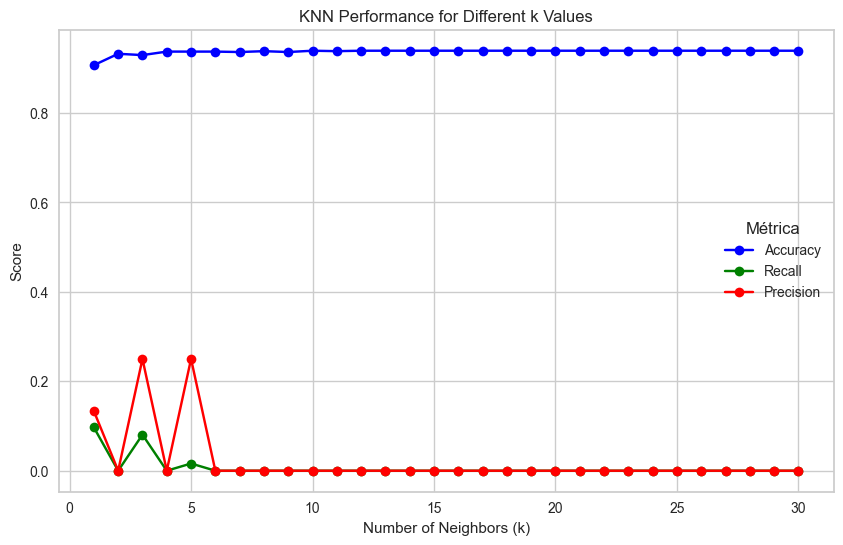

In [ ]:
# Loop to test all k values from 1 to 30
k_values = range(1, 31)
scores = []
recall = []
precision = []
for k in k_values:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(x3_train, y3_train)
    previsoes = knn.predict(x3_test)
    
    # Calculate and store the score
    score = knn.score(x3_test, y3_test)
    recall_score = sk.metrics.recall_score(y3_test, previsoes)
    precision_score = sk.metrics.precision_score(y3_test, previsoes)
    scores.append(score)
    recall.append(recall_score)
    precision.append(precision_score)
    
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', label='Accuracy', color='blue')
plt.plot(k_values, recall, marker='o', label='Recall', color='green')
plt.plot(k_values, precision, marker='o', label='Precision', color='red')
plt.title('KNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Métrica', loc='best')
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9295499021526419


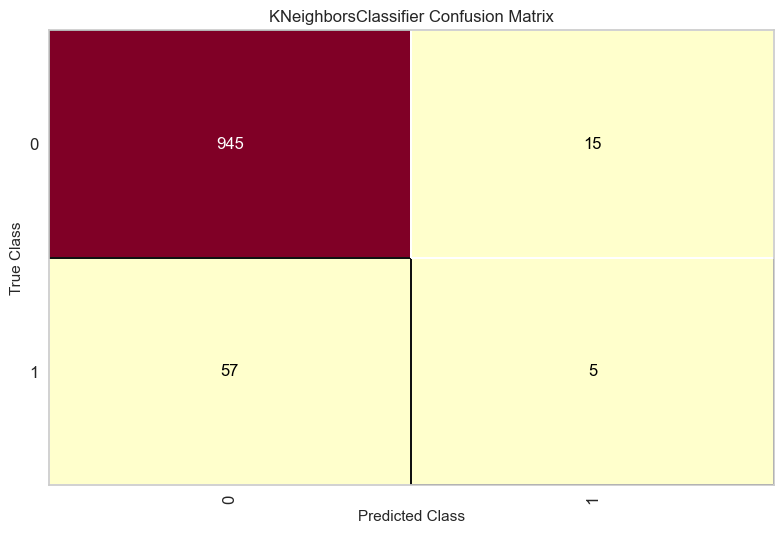

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x3_train, y3_train)
previsoes = knn.predict(x3_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(x3_train, y3_train)
score_naive_gaussian = cm.score(x3_test, y3_test)
print(score_naive_gaussian)
cm.show()

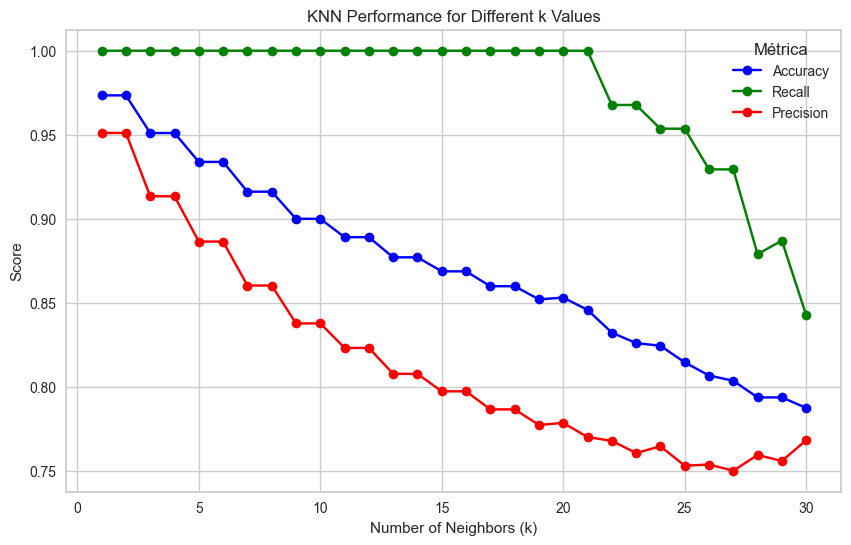

In [ ]:
# Loop to test all k values from 1 to 30
k_values = range(1, 31)
scores = []
recall = []
precision = []
for k in k_values:
    knn = sk.neighbors.KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(x4_train, y4_train)
    previsoes = knn.predict(x4_test)
    
    # Calculate and store the score
    score = knn.score(x4_test, y4_test)
    recall_score = sk.metrics.recall_score(y4_test, previsoes)
    precision_score = sk.metrics.precision_score(y4_test, previsoes)
    scores.append(score)
    recall.append(recall_score)
    precision.append(precision_score)
    
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', label='Accuracy', color='blue')
plt.plot(k_values, recall, marker='o', label='Recall', color='green')
plt.plot(k_values, precision, marker='o', label='Precision', color='red')
plt.title('KNN Performance for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Métrica', loc='best')
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9510161542470037


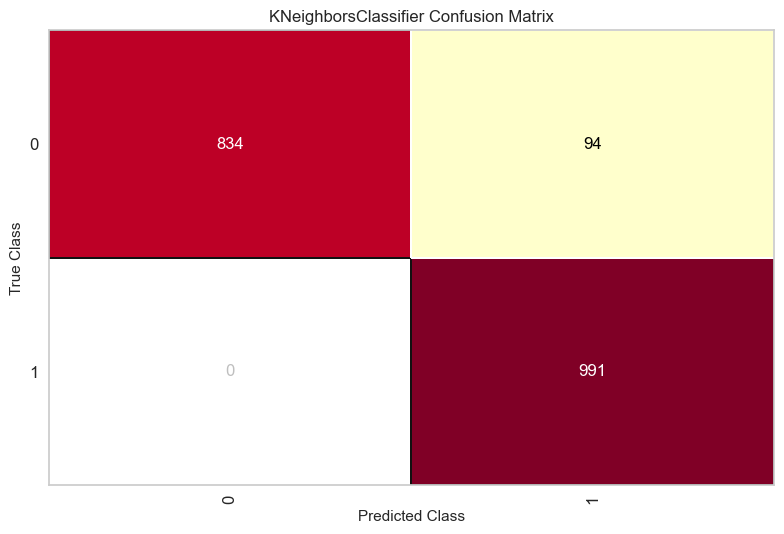

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(x4_train, y4_train)
previsoes = knn.predict(x4_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(x4_train, y4_train)
score_naive_gaussian = cm.score(x4_test, y4_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9073 - loss: 1.7097 - val_accuracy: 0.9618 - val_loss: 0.2762
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9073 - loss: 1.7097 - val_accuracy: 0.9618 - val_loss: 0.2762
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9131 - loss: 0.5725 - val_accuracy: 0.9618 - val_loss: 0.1738
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9131 - loss: 0.5725 - val_accuracy: 0.9618 - val_loss: 0.1738
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9463 - loss: 0.2937 - val_accuracy: 0.9618 - val_loss: 0.1866
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9463 - loss: 0.2937 - val_accuracy: 0.9618 - val_loss: 0.1866
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.2366 - val_accuracy: 0.9618 - val_loss: 0.1754
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.2366 - val_accuracy: 0.9618 - val_los

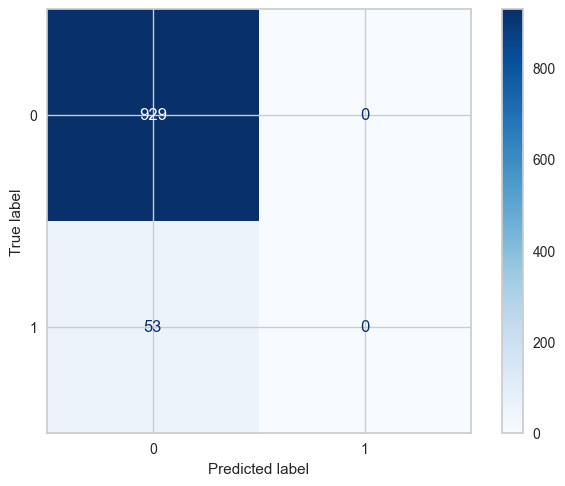

In [ ]:
# Convertir las etiquetas a formato categórico
num_classes = len(y1.unique())
y1_train_categorical = to_categorical(y1_train, num_classes)
y1_test_categorical = to_categorical(y1_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x1_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x1_train, y1_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Generar predicciones
y1_pred = model.predict(x1_test)
y1_pred_classes = np.argmax(y1_pred, axis=1)  # Convertir predicciones a clases
y1_test_classes = np.argmax(y1_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y1_test_classes, y1_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

Epoch 1/50


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5549 - loss: 4.5794 - val_accuracy: 0.7097 - val_loss: 0.5855
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5549 - loss: 4.5794 - val_accuracy: 0.7097 - val_loss: 0.5855
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6499 - loss: 0.7034 - val_accuracy: 0.7171 - val_loss: 0.5820
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6499 - loss: 0.7034 - val_accuracy: 0.7171 - val_loss: 0.5820
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6913 - loss: 0.6039 - val_accuracy: 0.7245 - val_loss: 0.5462
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6913 - loss: 0.6039 - val_accuracy: 0.7245 - val_loss: 0.5462
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6962 - loss: 0.5840 - val_accuracy: 0.7238 - val_loss: 0.5526
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6962 - loss: 0.5840 - val_accuracy: 0.7238 - val_

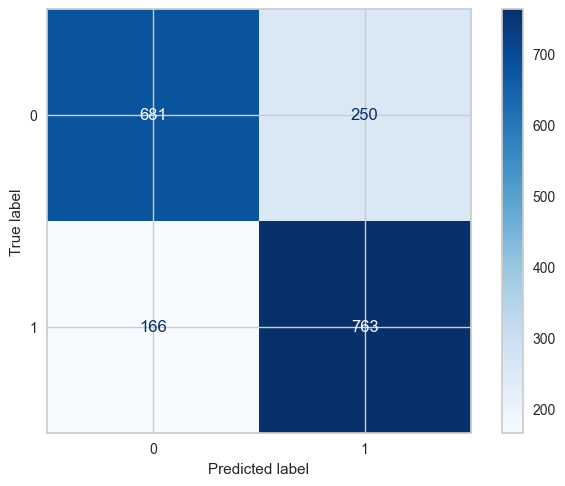

In [ ]:
# Convertir las etiquetas a formato categórico
num_classes = len(y2.unique())
y2_train_categorical = to_categorical(y2_train, num_classes)
y2_test_categorical = to_categorical(y2_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x2_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x2_train, y2_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Generar predicciones
y2_pred = model.predict(x2_test)
y2_pred_classes = np.argmax(y2_pred, axis=1)  # Convertir predicciones a clases
y2_test_classes = np.argmax(y2_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y2_test_classes, y2_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8790 - loss: 2.1017 - val_accuracy: 0.9548 - val_loss: 0.3685
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9035 - loss: 0.6766 - val_accuracy: 0.9548 - val_loss: 0.2506
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9406 - loss: 0.3276 - val_accuracy: 0.9548 - val_loss: 0.3211
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9431 - loss: 0.2674 - val_accuracy: 0.9548 - val_loss: 0.2728
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9522 - loss: 0.2649 - val_accuracy: 0.9548 - val_loss: 0.2374
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9507 - loss: 0.2607 - val_accuracy: 0.9548 - val_loss: 0.2593
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9542 - loss: 0.2472 - val_accuracy: 0.9548 - val_loss: 0.2194
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9510 - loss: 0.2431 - val_accuracy: 0.

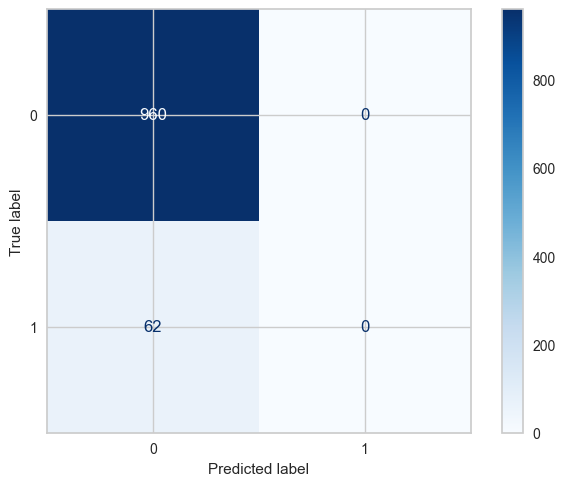

In [ ]:
# Convertir las etiquetas a formato categórico
num_classes = len(y3.unique())
y3_train_categorical = to_categorical(y3_train, num_classes)
y3_test_categorical = to_categorical(y3_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x3_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x3_train, y3_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Generar predicciones
y3_pred = model.predict(x3_test)
y3_pred_classes = np.argmax(y3_pred, axis=1)  # Convertir predicciones a clases
y3_test_classes = np.argmax(y3_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y3_test_classes, y3_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

Epoch 1/50


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5201 - loss: 5.4240 - val_accuracy: 0.6046 - val_loss: 0.6640
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5754 - loss: 0.8161 - val_accuracy: 0.7277 - val_loss: 0.6455
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6317 - loss: 0.6684 - val_accuracy: 0.6332 - val_loss: 0.6314
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6570 - loss: 0.6397 - val_accuracy: 0.7427 - val_loss: 0.6107
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6670 - loss: 0.6243 - val_accuracy: 0.7707 - val_loss: 0.5852
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6829 - loss: 0.6030 - val_accuracy: 0.7440 - val_loss: 0.5728
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6942 - loss: 0.5905 - val_accuracy: 0.7622 - val_loss: 0.5538
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6950 - loss: 0.5804 - val_accuracy: 0.7616 - val_

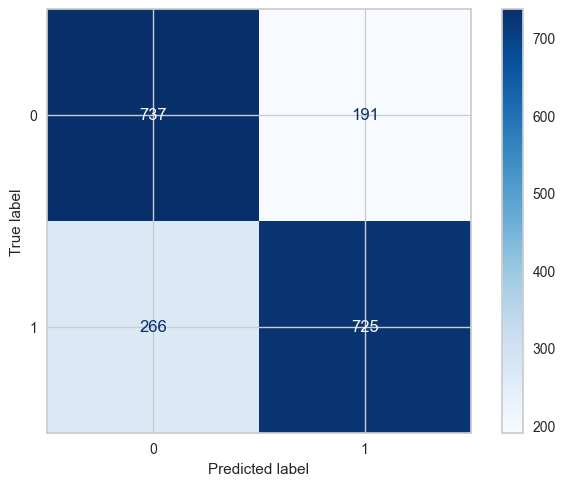

In [ ]:
# Convertir las etiquetas a formato categórico
num_classes = len(y4.unique())
y4_train_categorical = to_categorical(y4_train, num_classes)
y4_test_categorical = to_categorical(y4_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(x4_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x4_train, y4_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Generar predicciones
y4_pred = model.predict(x4_test)
y4_pred_classes = np.argmax(y4_pred, axis=1)  # Convertir predicciones a clases
y4_test_classes = np.argmax(y4_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y4_test_classes, y4_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

0.9460285132382892


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


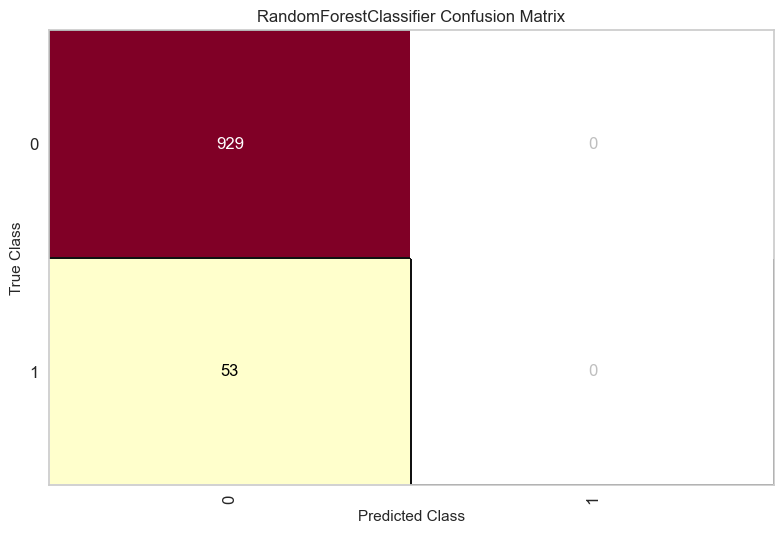

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x1_train, y1_train)
rf_predictions = rf.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.9930107526881721


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


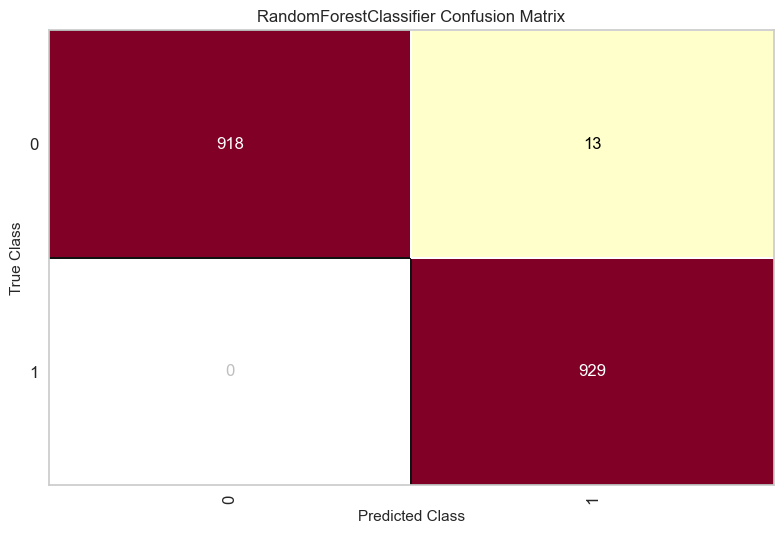

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x2_train, y2_train)
rf_predictions = rf.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9412915851272016


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


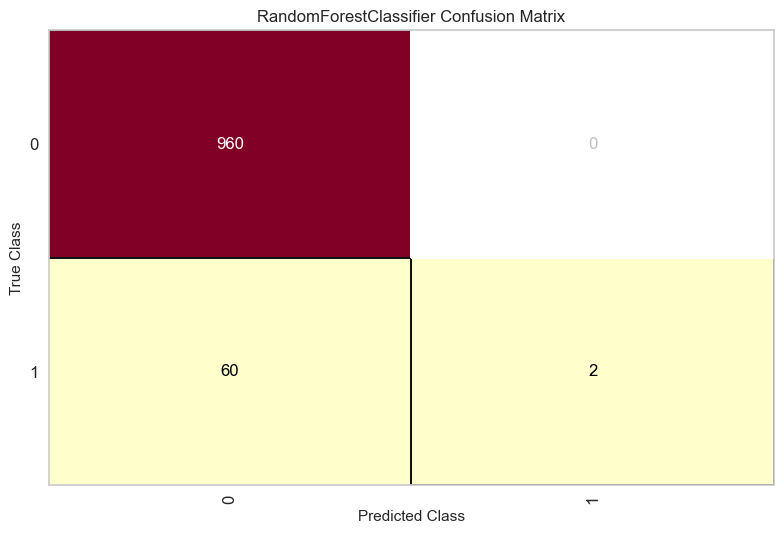

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x3_train, y3_train)
rf_predictions = rf.predict(x3_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(x3_train, y3_train)
score_naive_gaussian = cm.score(x3_test, y3_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9921834288692027


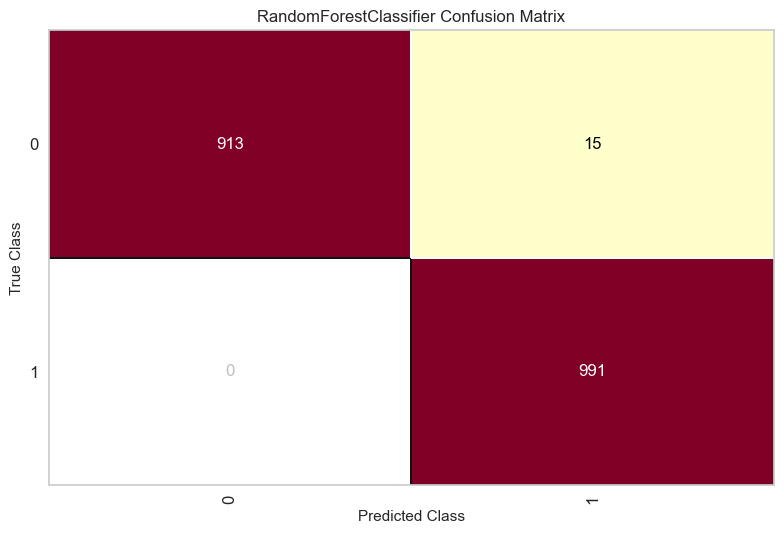

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x4_train, y4_train)
rf_predictions = rf.predict(x4_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(x4_train, y4_train)
score_naive_gaussian = cm.score(x4_test, y4_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9460285132382892


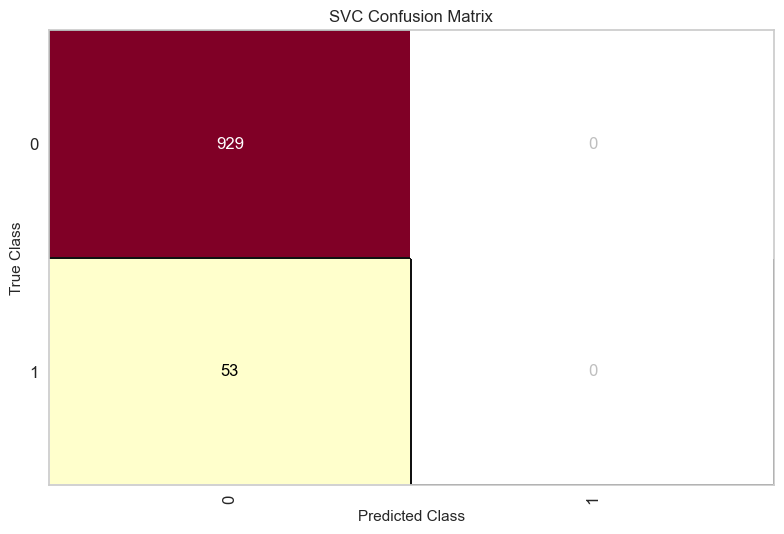

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x1_train, y1_train)
svm_predictions = svm.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(svm)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7602150537634409


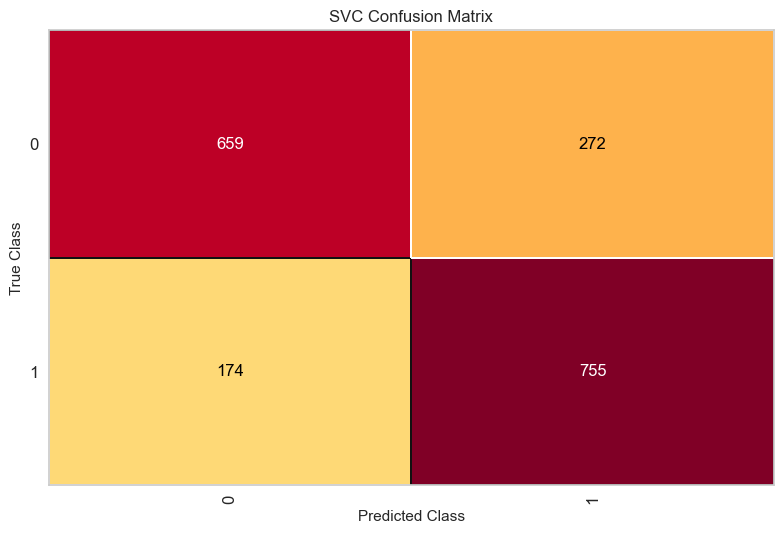

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x2_train, y2_train)
svm_predictions = svm.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(svm)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9460285132382892


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


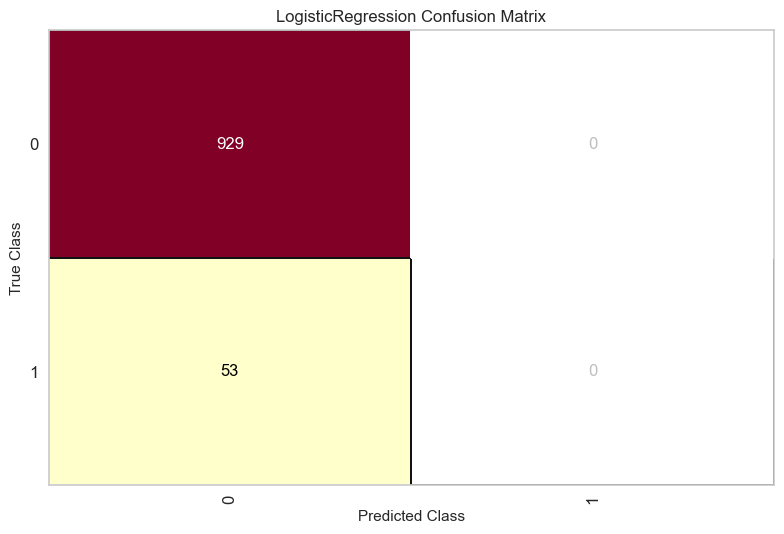

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x1_train, y1_train)
logreg_predictions = logreg.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(logreg)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.7741935483870968


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


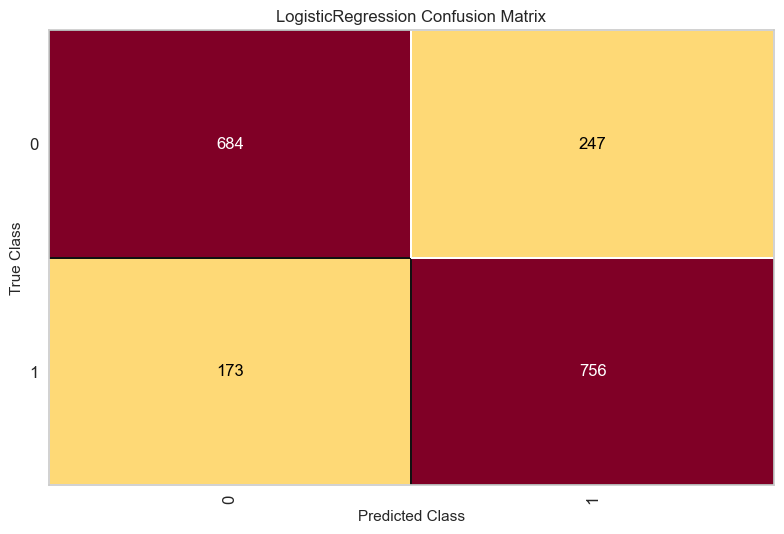

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x2_train, y2_train)
logreg_predictions = logreg.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(logreg)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.939918533604888


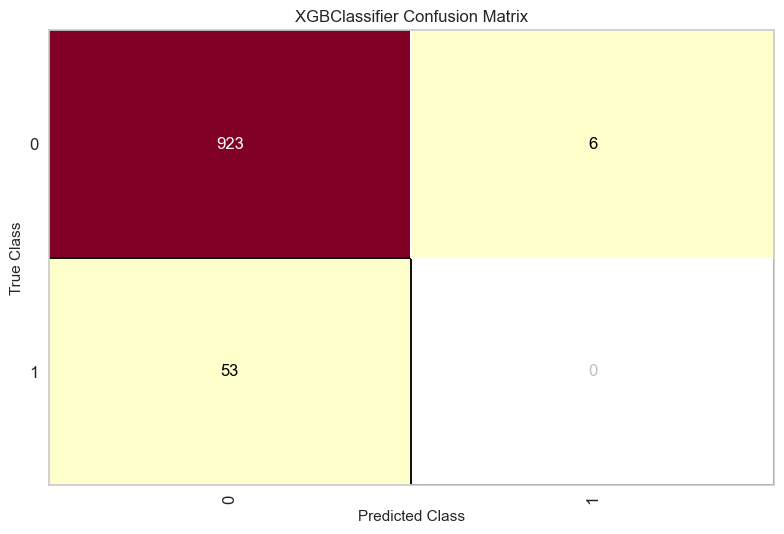

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x1_train, y1_train)
xgb_predictions = xgb.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(xgb)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.9725806451612903


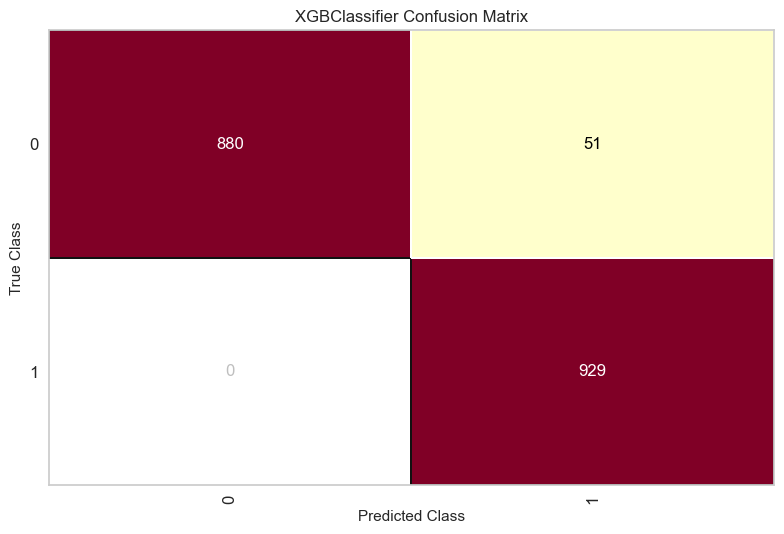

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x2_train, y2_train)
xgb_predictions = xgb.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(xgb)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

[LightGBM] [Info] Number of positive: 156, number of negative: 3771
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 3927, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039725 -> initscore=-3.185239
[LightGBM] [Info] Start training from score -3.185239
0.9419551934826884


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


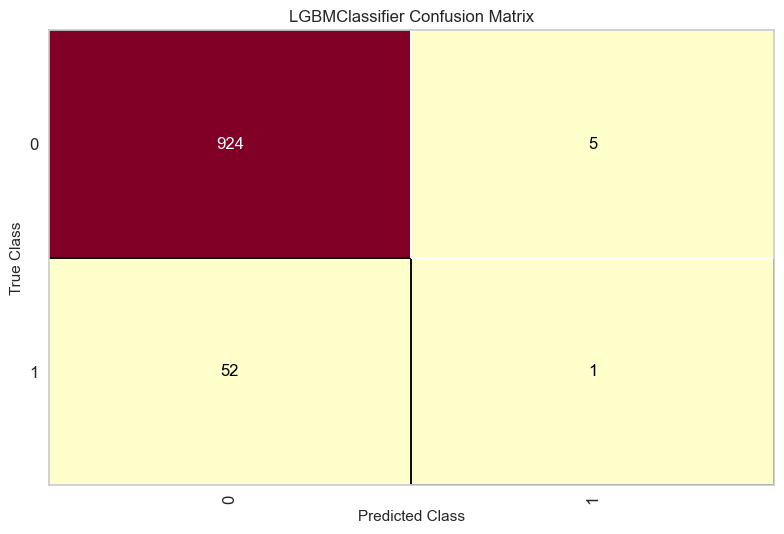

<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x1_train, y1_train)
lgbm_predictions = lgbm.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(lgbm)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

[LightGBM] [Info] Number of positive: 3669, number of negative: 3769
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 7438, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493278 -> initscore=-0.026891
[LightGBM] [Info] Start training from score -0.026891
0.9580645161290322


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


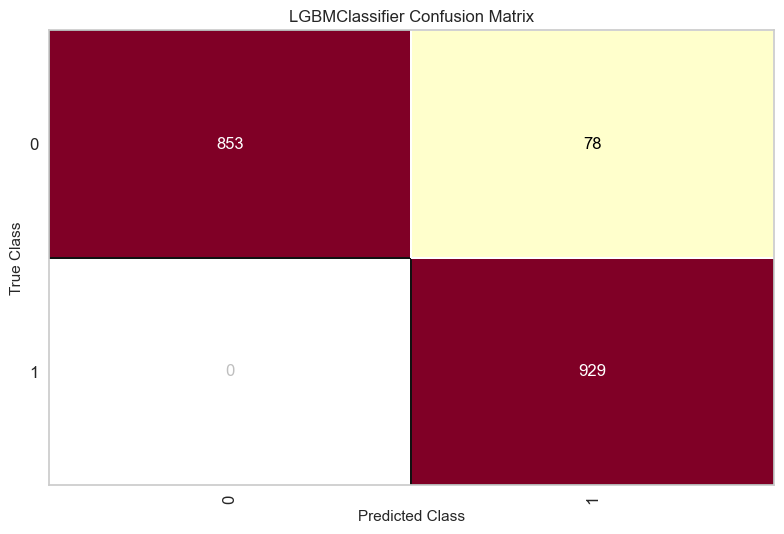

<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x2_train, y2_train)
lgbm_predictions = lgbm.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(lgbm)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9460285132382892


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


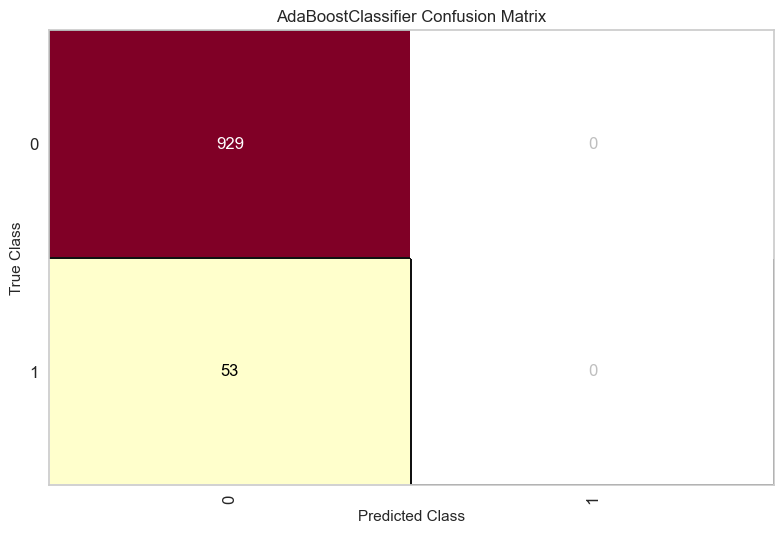

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(x1_train, y1_train)
adaboost_predictions = adaboost.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(adaboost)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.7661290322580645


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


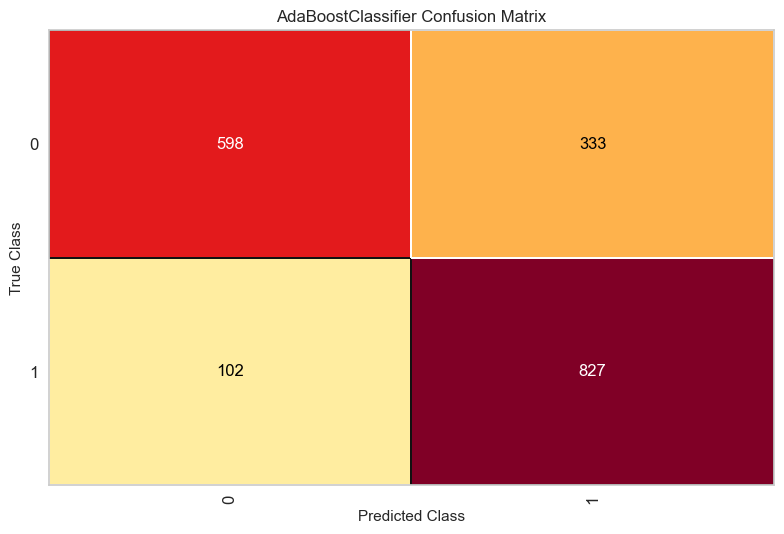

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(x2_train, y2_train)
adaboost_predictions = adaboost.predict(x2_test)

cm = yb.classifier.ConfusionMatrix(adaboost)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.939918533604888


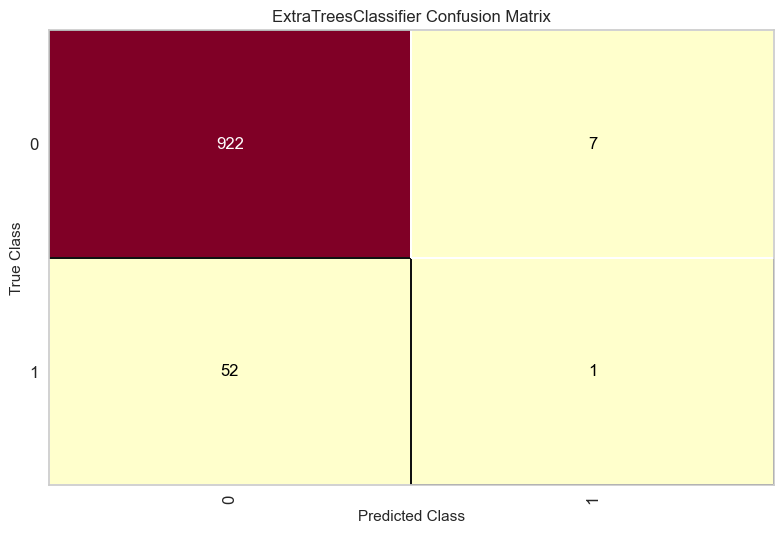

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(x1_train, y1_train)
etc_predictions = etc.predict(x1_test)

cm = yb.classifier.ConfusionMatrix(etc)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.9967741935483871


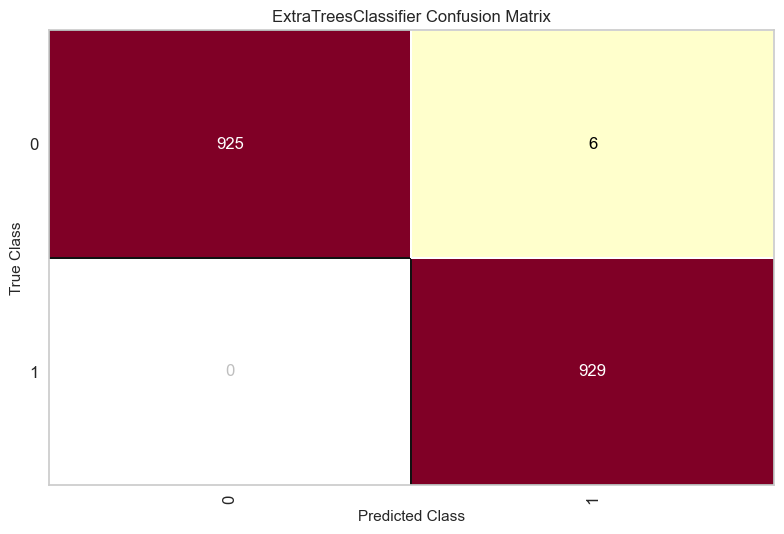

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(x2_train, y2_train)
etc_predictions = etc.predict(x2_test) 

cm = yb.classifier.ConfusionMatrix(etc)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

0.9419551934826884


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


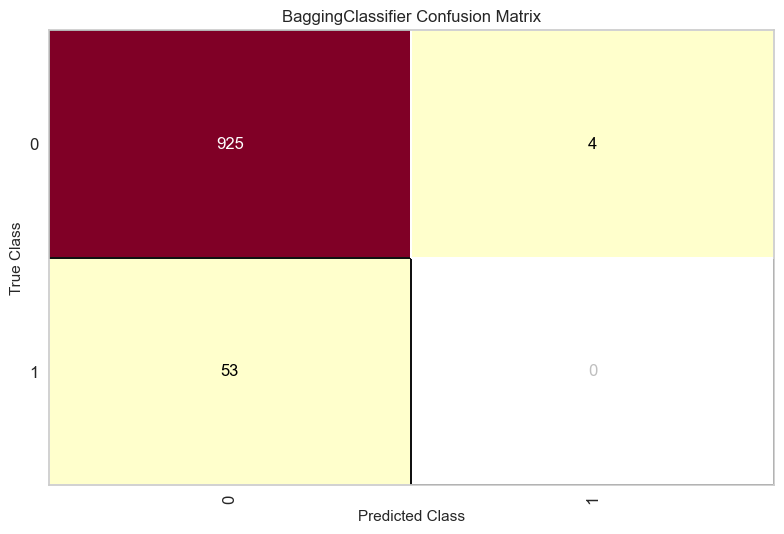

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Crear el modelo Bagging con DecisionTreeClassifier como base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(x1_train, y1_train)
bagging_predictions = bagging.predict(x1_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = yb.classifier.ConfusionMatrix(bagging)
cm.fit(x1_train, y1_train)
score_naive_gaussian = cm.score(x1_test, y1_test)
print(score_naive_gaussian)
cm.show()

0.989247311827957


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


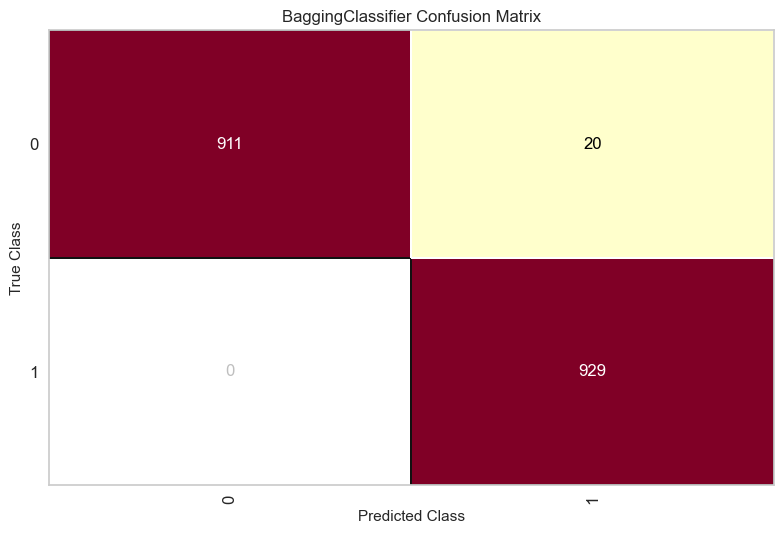

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Crear el modelo Bagging con DecisionTreeClassifier como base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(x2_train, y2_train)
bagging_predictions = bagging.predict(x2_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = yb.classifier.ConfusionMatrix(bagging)
cm.fit(x2_train, y2_train)
score_naive_gaussian = cm.score(x2_test, y2_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Precisión del modelo Bagging con ETC: 0.9439918533604889


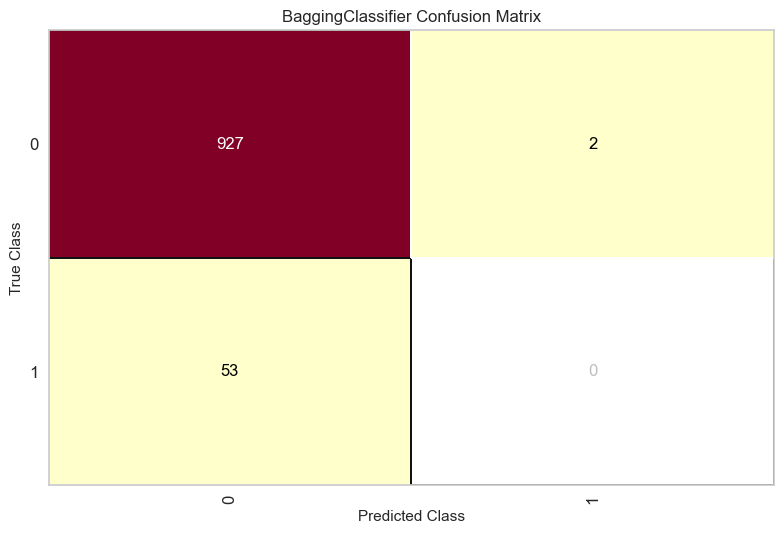

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:

# Crear el modelo Bagging con ExtraTreesClassifier como base
bagging = BaggingClassifier(estimator=ExtraTreesClassifier(n_estimators=100, random_state=42), 
                            n_estimators=50, random_state=42)
bagging.fit(x1_train, y1_train)
bagging_predictions = bagging.predict(x1_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = ConfusionMatrix(bagging, classes=np.unique(y1_train))
cm.fit(x1_train, y1_train)
score_bagging_etc = cm.score(x1_test, y1_test)
print(f"Precisión del modelo Bagging con ETC: {score_bagging_etc}")
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Precisión del modelo Bagging con ETC: 0.9940860215053764


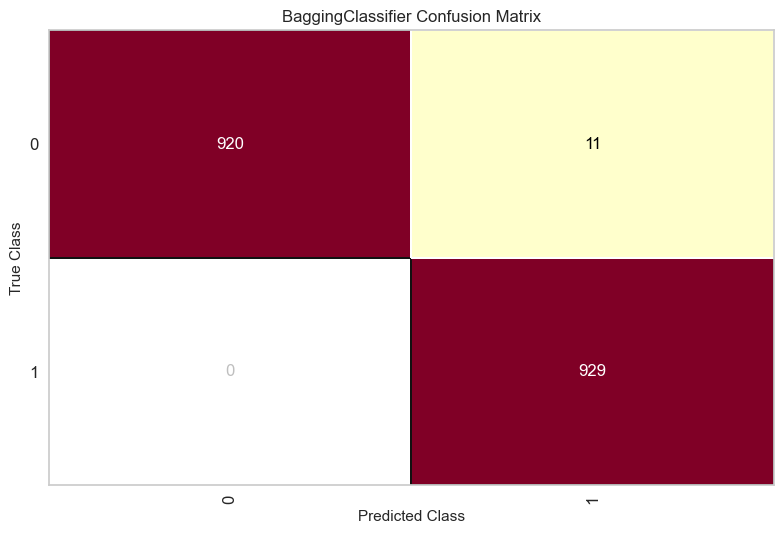

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Crear el modelo Bagging con ExtraTreesClassifier como base
bagging = BaggingClassifier(estimator=ExtraTreesClassifier(n_estimators=100, random_state=42), 
                            n_estimators=50, random_state=42)
bagging.fit(x2_train, y2_train)
bagging_predictions = bagging.predict(x2_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = ConfusionMatrix(bagging, classes=np.unique(y2_train))
cm.fit(x2_train, y2_train)
score_bagging_etc = cm.score(x2_test, y2_test)
print(f"Precisión del modelo Bagging con ETC: {score_bagging_etc}")
cm.show()

In [ ]:
print(dataset.iloc[1])


gender                 1.00
age                   80.00
hypertension           0.00
heart_disease          1.00
ever_married           1.00
work_type              4.00
Residence_type         0.00
avg_glucose_level    105.92
bmi                   32.50
smoking_status         1.00
stroke                 1.00
Name: 2, dtype: float64


In [ ]:
# Imprimir un ejemplo de los datos de entrada
print("Ejemplo de datos de entrada:")
print(x1_train.iloc[0])

# Crear un dato personalizado (reemplaza los valores con los que desees)
"""
'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
dataset.drop("id", axis=1, inplace=True)
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

"""
dato_personalizado = [[1, 90, 0, 0, 0, 1, 1, 120.5, 20, 1]]  # Ejemplo

# Realizar la predicción con el modelo entrenado
prediccion = knn.predict(dato_personalizado)
print("Predicción para el dato personalizado:", prediccion)

Ejemplo de datos de entrada:
gender                0.00
age                  40.00
hypertension          0.00
heart_disease         0.00
ever_married          1.00
work_type             4.00
Residence_type        1.00
avg_glucose_level    65.77
bmi                  31.20
smoking_status        1.00
Name: 3565, dtype: float64
Predicción para el dato personalizado: [0]


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
